# Navigation

---


### 1. Start the Environment

Iimporting necessary packages. See   [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) for installation of the Unity environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from agent import Agent



Change the `file_name` parameter to match the location of the Unity environment depending on the configuration.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = UnityEnvironment(file_name="Banana.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2.  State and Action Spaces
At each time step, the agent has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 


In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
def test_environment():
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:  
            # exit loop if episode finished
            env.close()
            break

    print("Score: {}".format(score))

In [ ]:
#Test the environment. When finished, close the environment.
#test_environment()

### 4. Training a Deep Reinforcement Learning Agent

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 4.1 Initialize the Agent

In [4]:
agent = Agent(state_size=37, action_size=4, seed=0, learning_alg='dueling_deep_Q_learning')

...Running dueling DQN
Network Architecture dueling_Q_net(
  (feature_modules): Sequential(
    (fc1): Linear(in_features=37, out_features=256, bias=True)
    (relu1): ReLU()
    (fc2): Linear(in_features=256, out_features=128, bias=True)
    (relu2): ReLU()
    (fc3): Linear(in_features=128, out_features=64, bias=True)
  )
  (value_modules): Sequential(
    (fc_v1): Linear(in_features=64, out_features=32, bias=True)
    (relu)v1): ReLU()
    (fc_v2): Linear(in_features=32, out_features=1, bias=True)
  )
  (advantage_modules): Sequential(
    (fc_a1): Linear(in_features=64, out_features=32, bias=True)
    (relu_a1): ReLU()
    (fc_a2): Linear(in_features=32, out_features=4, bias=True)
  )
)


### 4.2 Train the Agent

In [5]:
def train_agent(n_episodes=2000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995,train=True,log_file='dueling_dqn_checkpoint.pth'):
        """Deep Q-Learning.
        
        Params
        ======
            n_episodes (int): maximum number of training episodes
            max_t (int): maximum number of timesteps per episode
            eps_start (float): starting value of epsilon, for epsilon-greedy action selection
            eps_end (float): minimum value of epsilon
            eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        """
        scores = []                        # list containing scores from each episode
        scores_window = deque(maxlen=100)  # last 100 scores
        eps = eps_start                    # initialize epsilon
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]
            state = env_info.vector_observations[0]  
            score = 0
            for t in range(max_t):
                #Choose action from state using e greedy policy
                action = agent.act(state, eps)
                #Take action and observe reward and next state
                env_info = env.step(action)[brain_name]        # send the action to the environment
                next_state = env_info.vector_observations[0]   # get the next state
                reward = env_info.rewards[0]                   # get the reward
                done = env_info.local_done[0]                  # see if episode has finished               
                #Store experience tuple (s,a,s',r) in replay memory and learn from minibatch
                agent.step(state, action, reward, next_state, done)
                #update state
                state = next_state
                score += reward
                if done:
                    break 
            scores_window.append(score)       # save most recent score
            scores.append(score)              # save most recent score
            eps = max(eps_end, eps_decay*eps) # decrease epsilon
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            if i_episode % 100 == 0:
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=13.0:#rubric score
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), log_file)
                break
        return scores
   
       

Episode 100	Average Score: 0.45
Episode 200	Average Score: 2.68
Episode 300	Average Score: 6.25
Episode 400	Average Score: 9.71
Episode 500	Average Score: 10.58
Episode 600	Average Score: 11.88
Episode 700	Average Score: 12.18
Episode 799	Average Score: 13.01
Environment solved in 799 episodes!	Average Score: 13.01


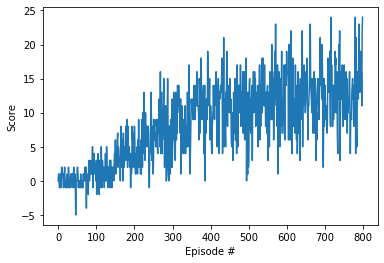

In [6]:
#Train the agent
scores = train_agent()
np.save('Dueling_DQN_scores.npy', np.array(scores))
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()